# Machine Learning in Python

## SIGN-IN HERE: [tinyurl.com/deltahacksinstitute](tinyurl.com/deltahacksinstitute)

## What is Machine Learning
Machine Learning:
* Computer learns by itself
* Requires lots of data that the computer can learn from

Today's activity, Image Classification:
* Data will be various digits
* End goal: computer can classify digits in images

Neural Netowork:
* Hot-topic in today's world
* Models a human-brain and the way we learn things
* Has layers
  * Input layer: Data
  * Hidden layers
  * Output layer: Result
* Can be trained with data

## Convolutional Neural Network (CNN)
* Special type of neural network, specifically for images
* Layers
  * Input layer: Image is fed, pixel by pixel
  * Hidden layers
  * Output layer: Probability associated with all the classes
  * Different types of Layers
* Data
  * Called MNIST (Modified National Institute of Standards and Technology database)
  * 60,000 training images and 10,000 testing images

![Diagram](img/diagram.png)

## Keras
* Machine Learning package
* Useful for quick prototyping of a lot of things, such as CNNs
* Uses tensorflow in the backend


## Import Statements
``` from __future__ import print_function ```: ensures interpreter doesn't round when printing values

``` import keras ```: imports the keras package

``` from keras.datasets import mnist ```: imports the MNIST dataset

``` from keras.models import Sequential ```: imports the Sequential Model, a model which allows us to add layers on top of each other and makes it easy to create CNNs

``` from keras.layers import Dense, Dropout, Flatten ```, ``` from keras.layers import Conv2D, MaxPooling2D ```: imports the different types of layers needed for CNNs

``` from keras import backend as K ```: imports the backend (we will be using tensorflow)


In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

## Constants
``` batch_size = 128 ```: a batch is how many images you would like to train your network with at once. After each batch, the network updates the weights in each layer.

``` num_classes = 10 ```: how many possible outputs we have (10 for 10 different digits)

``` epochs = 12 ```: how many times we are going to go through the data and feed it in the network

``` img_rows, img_cols = 28, 28 ```: size of the data, in pixels. 28 x 28 is default for MNIST

In [4]:
batch_size = 128
num_classes = 10
epochs = 5 #12 is ideal, but will take more time

# input image dimensions
img_rows, img_cols = 28, 28

## Preprocesing Data
``` (x_train, y_train), (x_test, y_test) = mnist.load_data() ```: "x" refers to the images, while "y" refers to the label for each image.

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


## Input Format
We check the type of backend that is being used and accordingly shape our input data. 

``` reshape(x_train.shape[0], 1, img_rows, img_cols) ```: (# of imgs, # colors, # of rows, # of cols)

``` input_shape = (1, img_rows, img_cols) ```: (# colors, # of rows, # of cols)

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

## Preprocessing Data
``` astype('float32') ```: describes the precision we want for each pixel value. We use 32 so that when we divide each pixel value in the next step, we can still preserve the precision.

``` /= 255 ```: each pixel value has a range from 0 - 255. Dividing the value by 255 results in a new range from 0 - 1 which is the type of input the Neural Network requires.

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Preprocessing Labels
``` to_categorical(y_train, num_classes) ```: converts the labels to class matrices, which have values between 0 - 1 as per the requirements of the Neural Network.

In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Creating the model
``` model = Sequential() ```: creates the sequential model
``` model.add() ```: adds a layer on top of the existing model
The important layers are ``` Conv2D ``` and ``` MaxPooling2D ```. These layers break the image into smaller pieces before doing the math on them. 

![Conv2D](img/conv2d_diagram.png)

The layers following help combine the data from these layers into one output.

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Compiling the Model
``` model.compile() ```: allows us to set parameters on how the model should be trained

``` loss=keras.losses.categorical_crossentropy ```: specifies the loss function. The loss function is the function which the algorithm best tries to achieve. It is a way of measuring how good/bad the network is performing.

``` optimizer=keras.optimizers.Adadelta() ```: specify the type of 
mathematical algorithm we would like to use to train the CNN

``` metrics=['accuracy'] ```: specify what information while training the CNN should be outputed to the user

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Training the model
``` model.fit() ```: tells the model to use the parameters and fit the weights of the layers so that the loss function is maximized. It returns an object that has the information of how the model was performing in each epoch.

``` verbose=1 ```: specifies how the output should be displayed during the training.

``` validation_data=(x_test, y_test) ```: specifies which set of data is meant for validation data. Validation data is data which we branch of the original dataset in order to see how the network's accuracy is. This allows for an un-biased evaluation of a network.


In [11]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2769 - acc: 0.9142 - val_loss: 0.0578 - val_acc: 0.9815
Epoch 2/12
60000/60000 [==============================] - 56s 936us/step - loss: 0.0931 - acc: 0.9721 - val_loss: 0.0435 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0689 - acc: 0.9794 - val_loss: 0.0357 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0550 - acc: 0.9833 - val_loss: 0.0301 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0492 - acc: 0.9854 - val_loss: 0.0319 - val_acc: 0.9887
Epoch 6/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0453 - acc: 0.9866 - val_loss: 0.0303 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0394 - acc: 0.9879 - val_loss: 0.0263 - val_a

## Analyzing the Model
The following code uses the history object we created above when the neural network completed. We can use this data to graph the accuracy of our network over each epoch. Don't worry too much about the code, it simply formats the data using a package called matplotlib.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


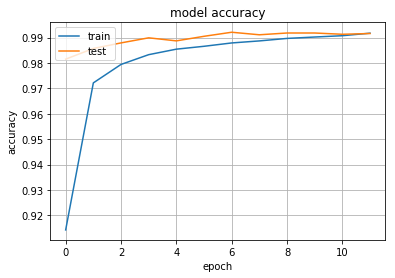

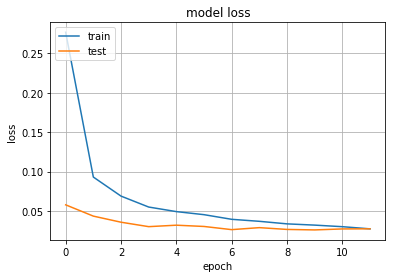

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()